In [100]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('abs_data.csv',index_col=0)

In [94]:
scaler = StandardScaler()
df[df.columns[:-1]]=scaler.fit_transform(df[df.columns[:-1]])

In [95]:
df

,FrEM_1.5_0_0,FrEM_1.5_0_1,FrEM_1.5_0_2,FrEM_1.5_0_3,FrEM_1.5_0_4,FrEM_1.5_0_5,FrEM_1.5_0_6,FrEM_1.5_0_7,FrEM_1.5_0_8,FrEM_1.5_1_0,...,FrEM_1.5_8_0,FrEM_1.5_8_1,FrEM_1.5_8_2,FrEM_1.5_8_3,FrEM_1.5_8_4,FrEM_1.5_8_5,FrEM_1.5_8_6,FrEM_1.5_8_7,FrEM_1.5_8_8,COVID
0,0.464522,-0.000279,-0.382726,-0.501013,-0.809835,-2.003255,-1.014853,-0.288300,-0.221696,-0.574850,...,-0.059312,-0.482996,-0.794010,-0.995326,-0.621466,-0.017066,-0.395275,-0.529252,-0.011077,1.0
1,1.454593,-0.230838,-0.980986,-1.153443,-0.154569,-0.742812,-0.182297,-0.235115,-1.062273,-0.310033,...,0.024149,-0.122418,0.402201,-0.490908,-0.109435,-0.915244,-1.030740,0.371709,0.434036,1.0
2,0.976096,0.514062,0.264862,-0.497222,0.218759,-0.312842,-1.360924,-0.299435,1.175851,-0.055617,...,-0.066775,0.792649,0.295582,-0.743236,-0.811718,-1.118120,0.558591,0.380626,-0.194406,1.0
3,0.272354,-0.374720,-0.180374,-0.106046,0.440238,-0.847047,-0.838172,1.088548,-0.998315,0.021618,...,0.233294,0.640693,0.900176,1.964355,-0.048997,0.346042,1.060970,0.069617,0.792056,1.0
4,-0.985760,0.019822,-1.163545,-0.155811,-1.020219,-1.390127,-1.123104,-1.146873,-0.811672,-0.197086,...,0.121293,-1.506672,-0.833365,0.106992,-0.119202,-0.936500,-0.370130,-1.454678,-0.801270,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,-0.472531,-0.380436,0.017664,0.094156,0.684630,0.598273,-0.516625,0.966301,-1.272904,-0.470477,...,-1.328304,1.473127,0.883302,3.923297,-0.022036,-0.903773,0.649658,0.583072,1.877916,1.0
371,-1.222750,-0.803756,0.610098,0.797833,1.235895,2.470073,-1.255292,0.501395,-0.138326,0.418454,...,1.286640,-0.950552,-1.459214,1.137225,0.953962,1.517758,-0.289006,1.717944,1.082960,1.0
296,1.191331,0.133672,0.554550,-0.592609,-0.106389,-0.492690,-0.612505,-1.083948,-0.110999,0.687766,...,-1.639817,-0.479963,-0.145797,-0.460047,-0.876542,-1.217192,0.157371,-0.912498,-0.724356,0.0
338,-0.005465,-0.554489,-1.270369,0.086643,-0.779311,-0.237978,0.130153,-1.273573,-0.695945,-1.233496,...,0.399009,-0.821359,-0.223859,-0.478771,-0.013166,-0.734893,0.052889,-0.451438,-0.808996,1.0


In [90]:
df.shape

(463, 163)

In [74]:
import seaborn as sns

<AxesSubplot: xlabel='COVID', ylabel='Count'>

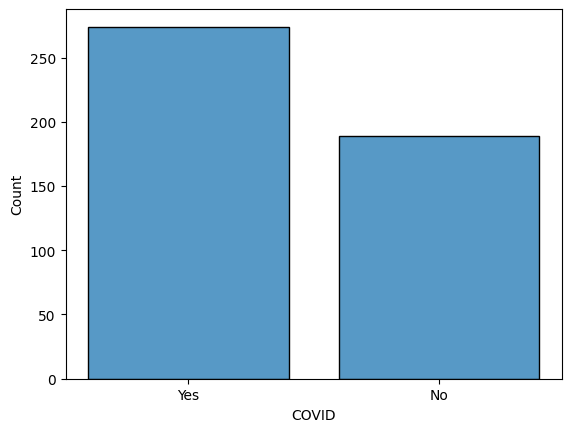

In [53]:
sns.histplot(x=df['COVID'].map({1.0:'Yes',0.0:'No'}),shrink=.8)

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

X = df[df.columns[:-1]]
Y = df[df.columns[-1]]

X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    random_state=41)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)
y_pred = neigh.predict(X_test)

print(classification_report(Y_test, y_pred))
print(accuracy_score(Y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.65      0.55      0.59        40
         1.0       0.69      0.77      0.73        53

    accuracy                           0.68        93
   macro avg       0.67      0.66      0.66        93
weighted avg       0.67      0.68      0.67        93

0.6774193548387096


In [99]:
from sklearn.model_selection import cross_val_score
neigh = KNeighborsClassifier(n_neighbors=3)
        
scores = cross_val_score(neigh,X,Y)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.62 accuracy with a standard deviation of 0.05


In [ ]:
import random
import numpy as np

D = len(df.columns)-1
N = 100
T = 10000
F = 1  # mutation scaling factor

class Agent:

    def __init__(self) -> None:
        self.x = np.array(Agent.gen_rand_x(),dtype=np.float64)
        self.accuracy = 0
        self.N_sel=0

    def gen_rand_x() -> list[float]:
        x = []
        for col in df.columns[:-1]:
            lb = min(df[col])
            ub = max(df[col])
            x.append(lb+random.random()*(ub-lb))
        return x

    def fitness_func(self) -> float:
        def to_binary(self):
            bin = []
            for x_i in self.x:
                eq = 1/(1+np.exp(-x_i))
                bin.append(eq > 0.5)
            return bin

        bin = to_binary(self)

        N_sel = bin.count(True)
        self.N_sel = N_sel

        to_delete = [df.columns[i] for i in range(len(bin)) if bin[i] == False]

        df1 = df.drop(to_delete, axis='columns')

        X = df1[df1.columns[:-1]]
        Y = df1[df1.columns[-1]]

        X_train, X_test, Y_train, Y_test = train_test_split(
            X,
            Y,
            test_size=0.2,
            random_state=41
        )

        neigh = KNeighborsClassifier(n_neighbors=3)
        neigh.fit(X_train, Y_train)
        y_pred = neigh.predict(X_test)

        error = np.sum(y_pred == Y_test)/len(y_pred)

        beta = random.random()

        self.accuracy = accuracy_score(Y_test, y_pred)

        return beta*error+(1-beta)*N_sel/D

    def Chain_Cyclone(self, t: float, i: int, x_best: np.array, agents: list['Agent']) -> None:
        r = np.array([random.random() for i in range(len(self.x))])
        if random.random() < 0.5:
            r1 = random.random()
            beta = 2*np.exp(r1*(T-t+1)/T)*np.sin(2*np.pi*r1)
            if (t/T < random.random()):
                # eq 13
                if (i == 0):
                    self.x = x_best+r*(x_best-self.x)+beta*(x_best-self.x)
                else:
                    self.x = x_best+r * \
                        (agents[i-1].x-self.x)+beta*(x_best-self.x)
            else:
                # eq 15
                x_rand = Agent.gen_rand_x()
                if (i == 0):
                    self.x = x_rand+r*(x_rand-self.x)+beta*(x_rand-self.x)
                else:
                    self.x = x_rand+r*(agents[i-1].x-self.x)+beta*(x_rand-self.x)
        else:
            # eq 11
            alpha = 2*np.sqrt(np.log(np.linalg.norm(r)))*r
            if (i == 0):
                self.x = self.x+r*(x_best-self.x)+alpha*(x_best-self.x)
            else:
                self.x = self.x+r*(agents[i-1].x-self.x)+alpha*(x_best-self.x)

    def Somersault(self, x_best: np.array):
        S = 2
        r2 = random.random()
        r3 = random.random()
        self.x = self.x + S*(r2*x_best-r3*self.x)

    def DE(self, i: int, agents: list['Agent']) -> None:
        x_r1 = agents[random.choice(
            [j for j in range(len(agents)) if j != i])].x
        x_r2 = agents[random.choice(
            [j for j in range(len(agents)) if j != i])].x
        x_r3 = agents[random.choice(
            [j for j in range(len(agents)) if j != i])].x

        # probability already satisfied

        V = Agent()
        V.x = x_r1 + F*(x_r2 - x_r3)

        if (V.fitness_func() < self.fitness_func()):
            self.x = V.x


def calc_Pr(i: int, ffs: list[float]) -> float:
    sum = np.sum(ffs)
    return ffs[i]/sum


agents = [Agent() for i in range(N)]
t = 0
best_ind = 0
while (agents[best_ind].accuracy < 0.9):
    ffs = [agent.fitness_func() for agent in agents]

    best_ind = np.argmin(ffs)

    print(agents[best_ind].accuracy)

    for i in range(len(agents)):
        agents[i].Chain_Cyclone(t, i, agents[best_ind].x, agents)

    for i in range(len(agents)):
        Pr = calc_Pr(i, ffs)
        if Pr < 0.5:
            agents[i].Somersault(agents[best_ind].x)
        else:
            agents[i].DE(i, agents)

    t += 1

best_bin = agents[best_ind].to_binary()

to_delete = [df.columns[i] for i in range(len(best_bin)) if best_bin[i] == True]

print('Accuracy',agents[best_ind].accuracy,'N_sel',agents[best_ind].N_sel)

In [ ]:
df1 = df.drop(to_delete, axis='columns')

X = df1[df1.columns[:-1]]
Y = df1[df1.columns[-1]]
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    random_state=41)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)
y_pred = neigh.predict(X_test)

print(classification_report(Y_test, y_pred))
print(accuracy_score(Y_test,y_pred))